# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output

from sklearn.model_selection import train_test_split
import random

# Create Synth Data

In [2]:
np.random.seed(0)
x_train = 2 * np.random.rand(300, 1)
y_train = 1 + 3 * x_train # + np.random.randn(300, 1)

# Plot Data

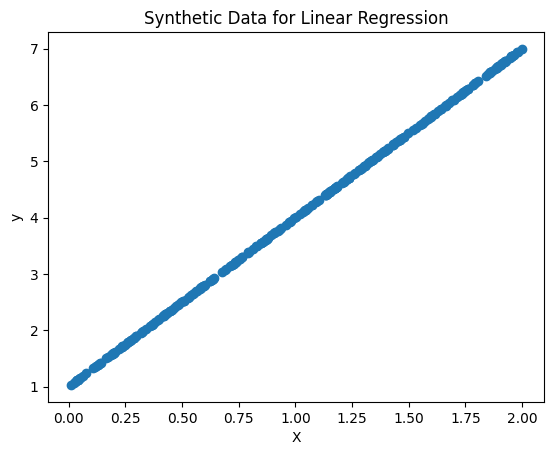

In [3]:
plt.scatter(x_train, y_train)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data for Linear Regression')
plt.show()


# Define Loss function

In [4]:
def error_function(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    # cost = np.sum(np.abs(y_true - y_predicted)) / len(y_true)
    return cost

### Mean Squared Error (MSE)

1. **MSE Loss Function**:

   $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

   where \( \hat{y}_i = wx_i + b \).

2. **Derivative with respect to weight \( w \)**:

   $$ \frac{\partial \text{MSE}}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)x_i = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)x_i $$

3. **Derivative with respect to bias \( b \)**:

   $$ \frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) $$

### Mean Absolute Error (MAE)

1. **MAE Loss Function**:

   $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

2. **Derivative with respect to weight \( w \)**:

   $$ \frac{\partial \text{MAE}}{\partial w} = -\frac{1}{n} \sum_{i=1}^{n} \text{sign}(y_i - \hat{y}_i) \cdot x_i $$

3. **Derivative with respect to bias \( b \)**:

   $$ \frac{\partial \text{MAE}}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} \text{sign}(y_i - \hat{y}_i) $$

Where:
- \( \text{sign}(z) \) is a function that returns \(1\) if \(z > 0\), \(-1\) if \(z < 0\), and \(0\) if \(z = 0\).
- \( y_i \) is the true value.
- \( \hat{y}_i \) is the predicted value, computed as \( \hat{y}_i = wx_i + b \).
- \( x_i \) is the input feature value.
- \( n \) is the number of data points.


# Implement Gradient Descent

In [5]:
def batch_gradient_descent(x, y, batch_size, iterations, learning_rate, stopping_threshold=1e-6):
    current_weight = random.uniform(2, 4)
    current_bias = random.uniform(-1, 1)
    n = len(x)
    
    costs = []
    weights = []
    biases = []
    previous_cost = None
    
    for iteration in range(iterations):
        # Shuffle data for each iteration
        indices = np.arange(n)
        np.random.shuffle(indices)
        
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        
        for i in range(0, batch_size):
            x_batch = x_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            # Making predictions
            y_predicted = (current_weight * x_batch) + current_bias
            current_cost = error_function(y_batch, y_predicted)
 
            if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
                return weights, biases, costs
            
            previous_cost = current_cost
            costs.append(current_cost)
            weights.append(current_weight)
            biases.append(current_bias)
            
            # MSE
            weight_derivative = -(2/len(x_batch)) * np.sum(x_batch * (y_batch - y_predicted))
            bias_derivative = -(2/len(x_batch)) * np.sum(y_batch - y_predicted)
            
            # MAE
            # weight_derivative = -np.mean(x * np.sign(y - y_predicted))
            # bias_derivative = -np.mean(np.sign(y - y_predicted))

            # Updating weights and bias
            current_weight = current_weight - (learning_rate * weight_derivative)
            current_bias = current_bias - (learning_rate * bias_derivative)
                 
    return weights, biases, costs

# Plot Cost Function

In [6]:
iterations = 250
learning_rate = 0.05
batch_size = 1 # 1 for SGD

In [7]:
%matplotlib tk

In [8]:
weights, biases, costs = batch_gradient_descent(x_train, y_train, batch_size, iterations, learning_rate)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 18))

# Plotting the data points and fit line
scatter = ax1.scatter(x_train, y_train, marker='o', color='red')
line, = ax1.plot(x_train, x_train * weights[0] + biases[0], color='blue', linestyle='dashed')
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_title("Data Points and Fit Line")

# Plotting the cost curve
cost_line, = ax2.plot([], [], color='green')
ax2.set_xlim(0, len(costs))
ax2.set_ylim(0, max(costs))
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Cost")
ax2.set_title("Cost Curve")

# Plotting Costs vs. Weights
weight_cost_line, = ax3.plot([], [], color='purple', linestyle='-')
ax3.set_xlim(min(weights), max(weights))
ax3.set_ylim(0, max(costs))
ax3.set_xlabel("Weights")
ax3.set_ylabel("Cost")
ax3.set_title("Costs vs. Weights")

# Plotting Costs vs. Biases
bias_cost_line, = ax4.plot([], [], color='orange', linestyle='-')
ax4.set_xlim(min(biases), max(biases))
ax4.set_ylim(0, max(costs))
ax4.set_xlabel("Biases")
ax4.set_ylabel("Cost")
ax4.set_title("Costs vs. Biases")

# Animation function
def update(frame):
    # Update line fitting
    current_weight = weights[frame]
    current_bias = biases[frame]
    y_pred = current_weight * x_train + current_bias
    line.set_ydata(y_pred)
    
    # Update cost curve
    cost_line.set_data(range(frame + 1), costs[:frame + 1])
    
    # Update Costs vs. Weights
    weight_cost_line.set_data(weights[:frame + 1], costs[:frame + 1])
    
    # Update Costs vs. Biases
    bias_cost_line.set_data(biases[:frame + 1], costs[:frame + 1])
    
    return line, cost_line, weight_cost_line, bias_cost_line

# Create animation
ani = FuncAnimation(fig, update, frames=len(weights), blit=False, interval=200)

plt.tight_layout()
plt.show()

In [9]:
%matplotlib inline

# Check Best Indexes

In [10]:
best_index = np.argmin(costs)
print("The best weight Steps", best_index)

best_model = {}

best_model['coef_'] = weights[best_index]
best_model['intercept_'] =biases[best_index]

print(best_model)

print(f"Best Weight: {best_model['coef_']} Best Bias: {best_model['intercept_']}")

The best weight Steps 30
{'coef_': 3.1246661459462084, 'intercept_': 0.8573172751447327}
Best Weight: 3.1246661459462084 Best Bias: 0.8573172751447327


In [11]:
print("Latest Index", len(costs) - 1)

latest_model = {}

latest_model['coef_'] = weights[-1]
latest_model['intercept_'] =biases[-1]

print(latest_model)

print(f"Latest Weight: {latest_model['coef_']} Best Bias: {latest_model['intercept_']}")

Latest Index 80
{'coef_': 3.0623107309416127, 'intercept_': 0.9467896196540332}
Latest Weight: 3.0623107309416127 Best Bias: 0.9467896196540332


In [12]:
costs[best_index]

6.202088227613884e-07

In [13]:
costs[-1]

2.0803329729310808e-05

# Plot

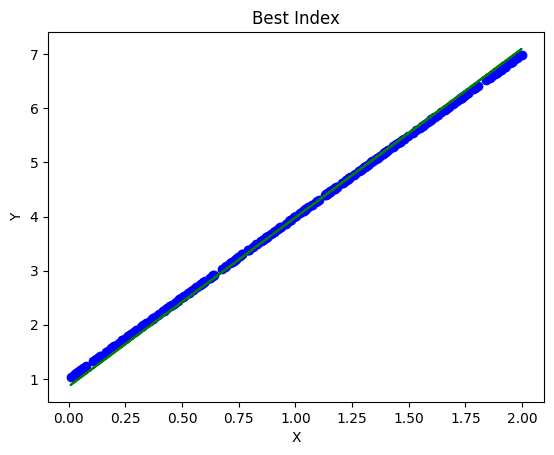

In [14]:
plt.title("Best Index")
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x_train,y_train,c='b')
plt.plot(x_train,weights[best_index]*x_train + biases[best_index],c='g')

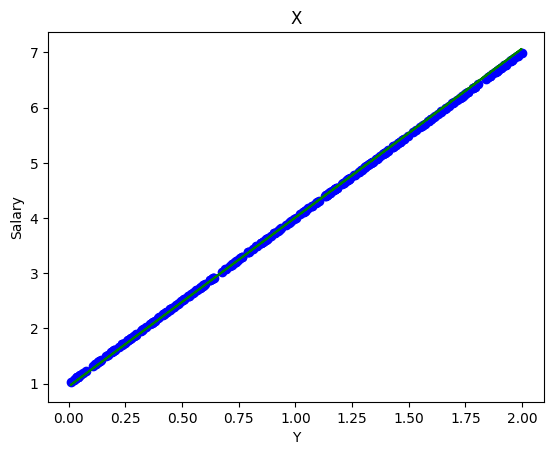

In [15]:
plt.title("X")
plt.xlabel('Y')
plt.ylabel('Salary')
plt.scatter(x_train,y_train,c='b')
plt.plot(x_train,weights[-1]*x_train + biases[-1],c='g')